# Introdução, Motivação e Conceitos Básicos

**Notas de Aula de Teoria dos Grafos**

Prof<sup>a</sup> Patrícia D. L. Machado

UFCG – Unidade Acadêmica de Sistemas e Computação




**ATENÇÃO:**
* No menu principal, clique em `Ambiente de Execução` -> `Executar tudo` para (re-)carregar as imagens utilizadas neste notebook, se necessário.
* O bloco de código abaixo instala pacotes utilizados neste notebook.

In [ ]:
#@title
import networkx as nx
import matplotlib.pyplot as plt
!git clone https://github.com/pdlmachado/gtufcg.git
from gtufcg.util.networkx_util import draw_graph, read_multiple_CSV
from PIL import Image
import graphviz
from gtufcg.graphviz.G1 import create_G1



Cloning into 'gtufcg'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 819 (delta 132), reused 196 (delta 112), pack-reused 597
Receiving objects: 100% (819/819), 1.48 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (548/548), done.


# Introdução

Muitas situações no mundo real podem ser descritas por meio de um diagrama formado por pontos e linhas. O objetivo é observar se dois ou mais pontos estão conectados e o padrão desta conexão. Por exemplo, as redes sociais podem representar indivíduos e suas relações através de um diagrama deste tipo ([Figura 1](#fig1)). Neste caso, indivíduos, representados por pontos, estão ligados a fim de estabelecer uma relação de amizade, representada por uma linha. Ao analisar este diagrama, por exemplo, podemos observar padrões de relacionamento em um grupo, bem como identificar oportunidades para disseminação de informações, considerando os caminhos existentes entre indivíduos que podem ou não estar ligados diretamente.





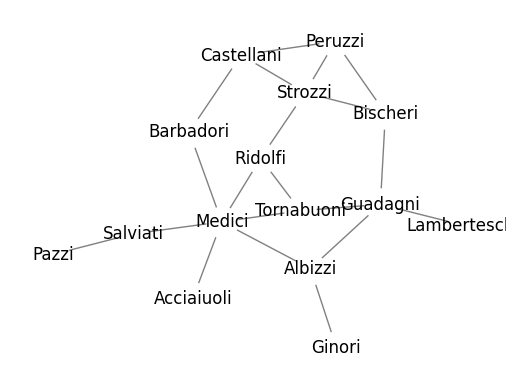

In [ ]:
#@title
#@markdown <a name="fig1">Figura 1</a>: Ilustração gráfica de uma rede social.
SN = nx.florentine_families_graph()
draw_graph(SN, layoutid='kamada_kawai_layout', node_color="white")

Grafos são utilizados na prática para modelar diversos conceitos presentes em nossas vidas. A web, por exemplo, é um grafo virtual gigantesco onde cada página é um vértice e as arestas são links que levam de uma página para outra. Aplicações com GPS fazem uso de grafos para representar pontos de interesse e calcular rotas de um ponto a outro ponto.

Hoje em dia, praticamente toda e qualquer rede de informações e conhecimento humano é representada através de grafos. Algoritmos sobre grafos são aplicados a fim de encontrar soluções para os diferentes problemas em diferentes representações. Neste sentido, o estudo da Teoria dos Grafos nos ajuda a conhecer melhor esta poderosa ferramenta, incluindo modelos, propriedades e algoritmos diversos que podem ser aplicados para resolver problemas práticos, não só em Ciência da Computação. O estudo de grafos vai muito além de conceitos básicos de programação deste conceito (alvo das disciplinas de programação e estrutura de dados), mas se remete, principalmente, a representação e solução de problemas. Este é o objetivo central desta disciplina.

# Problemas Clássicos

As 7 pontes de _Konigsberg_ ligam as ilhas A e B e as margens C e D ([Figura 2](#fig2)).  **Existe uma trilha que passe por cada uma das pontes apenas uma vez**? Este problema pode ser representado através de um grafo onde os vértices representam as porções de terra e as arestas representam as pontes. Como vamos aprender em aulas posteriores, não existe esta trilha.

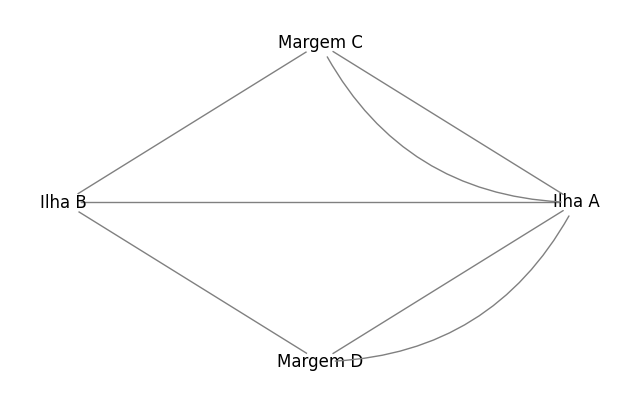

In [ ]:
#@title
#@markdown <a name="fig2">Figura 2</a>: Pontes de Konigsberg.
seven_bridges = nx.read_graphml('gtufcg/graphs/sevenbridges.graphml')
draw_graph(seven_bridges,layoutid='kamada_kawai_layout', node_color="white",
           node_labels=nx.get_node_attributes(seven_bridges,'label'))


Um outro problema clássico que pode ser representando através de grafos é o problema das 4 cores. **Quantas cores são necessárias para colorir um mapa de forma que regiões vizinhas possuam cores diferentes**?

É sempre possível colorir qualquer figura planar com apenas 4 cores ([Figura 3](#fig3)). Podemos representar problemas semelhantes através da coloração de vértices onde vértices ligados diretamente não podem receber a mesma cor.

<a name="fig3">Figura 3</a>: Coloração de mapas planares.

![picture](https://drive.google.com/uc?export=view&id=1PboyPo2WFgYjiIB0kJTCBItOQK2U9e05)





# Problemas Comuns na Engenharia de Software

Grafos são utilizados para modelar programas a fim de tornar possível realizar diferentes análises sobre os mesmos tal como a cobertura de testes. Neste caso, programas são usualmente representados através de Grafos de Fluxo de Controle. Na

Na [Figura 4](#fig4), o trecho de código é representado por um grafo onde os vértices representam as linhas de código que são ligadas através de arcos os quais representam o direcionamento do fluxo de execução.

<a name="fig4">Figura 4</a>: Grafo de fluxo de controle.

![picture](https://drive.google.com/uc?export=view&id=1bSMTRLv5MkmS8aDFIFQwtdXqarI8iuZn)


Como uma meta de avaliação da qualidade de uma suite de testes, espera-se que casos de teste percorram de forma sistemática os diferentes caminhos e elementos do grafo a fim de garantir que as linhas de código foram efetivamente testadas.

A partir da análise do grafo de fluxo de controle, podemos investigar os seguintes problemas:

- **Existencial** : Existe um conjunto finito de casos de teste que executa todos os comandos de um programa pelo menos uma vez?
- **Construção** : Como construir este conjunto?
- **Enumeração** : Quantos conjuntos existem? Podem ser listados? São finitos?
- **Otimização** : Qual o menor conjunto?



Outro problema importante que pode ser tratado através do uso de grafos é o problema da modificação de um software.  **Que classes devem ser testadas após a realização de uma modificação** ?

Para tal precisamos identificar que partes do software são afetadas pela modificação. Isto pode ser feito observando a relação de dependência entre as classes. Uma classe _A_ é dependente de uma classe _B_ se _A_ usa _B_. Isto pode ocorrer, por exemplo, quando _A_ possui um objeto da classe _B_ como parâmetro em um ou mais métodos ou _A_ possui uma variável local da classe _B_.

Através da análise do **Grafo de Dependências** podemos investigar os custos e o impacto de modificações em um software. Como exemplo, considere o grafo de dependência de classes apresentado na [Figura 5](#fig5), onde os arcos representam a relação de dependência entre duas classes. Neste exemplo, observamos que todas as classes são dependentes da classe **Card**. Em particular, a classe **Address** é dependente de **Card** através de **Ship.** Assim, modificações em **Card** devem ser validadas através do teste de todas as classes. O mesmo não acontece com a classe **View** : modificações nesta classe requerem teste apenas nela. Observe também que **Card** , **Ship** e **Address** possuem uma relação de _dependência circular_. Portanto, alterações nestas classes podem levar a ciclos repetitivos de correções.

<a name="fig5">Figura 5</a>: Grafo de Dependência de Classes

![picture](https://drive.google.com/uc?export=view&id=1NjLwQ93BDAYTAuPK71nwCZv3tK0bI9Fm)








Grafos também podem ser utilizados para representar situações onde queremos identificar grupos de elementos fortemente relacionados. Por exemplo, podemos usar um grafo de dependência de classes para particionar o esforço de evolução de um software entre diferentes equipes, minimizando a necessidade de interação entre estas equipes. Cada equipe recebe um grupo de classes que possuem forte dependência entre si, mas pouca dependência direta com as demais como podemos observar na [Figura 6](#fig6).

<a name="fig6">Figura 6</a>: Grupos de classes relacionadas por dependência.

![picture](https://drive.google.com/uc?export=view&id=1RFMly37OTiGqMbdByF9pn7nyRARTJCrn)



# Histórico

Não é possível determinar exatamente quando estudos e usos de grafos tiveram início uma vez que se trata de um conceito intuitivo que pode ter sido usado desde épocas remotas da civilização. Abaixo listamos alguns pontos e fatos marcantes na evolução de conceitos e formalização do que conhecemos hoje como Teoria dos Grafos.

- Konigsberg (Euler 1735)
- Grafo Hamiltoniano (Hamilton 1805-65)
- Conceito de Árvore (Kirchhoff 1824-87)
- Grafos Planares (Mobius/Kuratowski/Dudeney 1840/1913)
- Conjectura das 4-cores (1852)
- Busca por algoritmos eficientes
- Larga aplicabilidade: Matemática, Computação, Comunicação e Otimização Combinatória
- Soluções para algoritmos intratáveis

# Exemplos de Modelagem de Problemas Usando Grafos

## Rotas de Transporte




Os governos estaduais cobram impostos para a entrada de mercadorias vindas de outros estados. Para minimizar os custos de transportes, é importante escolher rotas de transporte de um estado a outro que atravesse o menor número possível de estados. Como podemos resolver este problema usando grafos? Construímos um grafo onde os estados são vértices e as arestas representam a existência de fronteira entre 2 estados ([Figura 7](#fig7)).

Para encontrar a melhor rota, calculamos o menor caminho no grafo entre dois vértices.

<a name="fig7">Figura 7</a>: Mapa do Nordeste e Grafo que modela vizinhança entre os estados.

| ![picture](https://drive.google.com/uc?export=view&id=1jYZLeeApBp60E2SgBCJVmMenhAWpw6up) | ![picture](https://drive.google.com/uc?export=view&id=1mkJVcLramMdXX10id4uhTKaVNWpHWWTz) |


## Guarani's Puzzle

Existem 4 cavalos em um tabuleiro de xadrez 3x3: dois brancos nos cantos inferiores e dois pretos nos cantos superiores ([Figura 8](#fig8). Qual é o número mínimo de movimentos necessários para que os cavalos brancos ocupem as posições dos cavalos pretos e vice-versa?

<a name="fig8">Figura 8</a>: Tabuleiro 3x3.

![picture](https://drive.google.com/uc?export=view&id=15ZBT3E9vkQUtAmvODwxpS29FrJP83gyd)

Criamos um grafo onde cada célula do tabuleiro é representada por um vértice e adicionamos uma aresta entre dois vértices se o cavalo pode se mover entre as células correspondentes. Representando graficamente este mesmo grafo de outra forma, observamos que é na verdade um círculo. Na representação abaixo, os vértices de cor preta representam as células onde os cavalos pretos se encontram, enquanto os vértices com de cor branca representam as células onde os cavalos brancos se encontram.

![picture](https://drive.google.com/uc?export=view&id=1ISw7kOmXaJl6JrsKWaOnQ7X8I4h_2050) | ![picture](https://drive.google.com/uc?export=view&id=1p_vaDJbDewSCZotxBso1usMbsVzaUhSY)

Através deste grafo, descobrimos que mover os cavalos brancos para as células dos cavalos pretos e vice-versa consiste em deslocarmos os mesmos no grafo seguindo a ordem circular, um de cada vez. Ou seja, determinar o número mínimo de movimentos no tabuleiro resume-se a contar o número mínimo de deslocamentos dos cavalos no círculo, considerando que apenas um cavalo se move por vez.

# Grafo Não-Direcionado

 **Definição 01**. Um grafo é um par ordenado $(V(G),E(G))$, onde:

 - $V(G)$ é um conjunto de **vértices** ;
- $E(G)$ é um conjunto de **arestas** , juntamente com uma **função de incidência** $\psi$.
  - Se $e$ é uma aresta e $u$ e $v$ são vértices, $\psi(e) = \{u,v\} = uv = vu$
  - $u$ e $v$ são **adjacentes** ou vizinhos e $e$ é **incidente** a $u$  e $v$
  - $u$ e $v$ são os **terminais** de $e$

Observe que podemos representar o resultado da função de incidência usando a notação de conjunto de vértices ou a concatenação dos nomes dos vértices em qualquer ordem: $uv$ ou $vu$.  Como este relacionamento não possui ordem, os nomes dos vértices podem aparecer em qualquer ordem. Por este motivo, G é denominado de **grafo não-direcionado** (*undirected graph*)

Por exemplo, considere o grafo $G_1$ abaixo com seu conjunto de vértices, arestas e função de incidência. A aresta `s`, segundo a função de incidência, relaciona os vértices `a` e `b`, indicando que são adjacentes através da mesma.

$G_1 = (V(G_1),E(G_1))$, onde:

$V(G_1)$ = {`a`,`b`,`c`,`d`,`e`}  </br>
$E(G_1)$ = {`s`,`t`,`u`,`v`,`w`,`x`,`y`,`z`}  </br>
$\psi_{G_1}$(`s`)=`ab`, $\psi_{G_1}$(`t`)=`aa`,  
$\psi_{G_1}$(`u`)=`bc`, $\psi_{G_1}$(`v`)=`cd`, </br>
$\psi_{G_1}$(`x`)=`bd`, $\psi_{G_1}$(`w`)=`cd`, </br>
$\psi_{G_1}$(`y`)=`ad`, $\psi_{G_1}$(`z`)=`de` </br>


O número de vértices e arestas de um grafo $G$ é dado por $v(G)$ e $e(G)$ respectivamente (**ordem** e **tamanho** de $G$). Em nosso exemplo, a ordem de $G_1$ é 5 e o tamanho de $G_1$ é 8.

Grafos podem ser representados por diagramas ou gráficos onde vértices são representados por pontos e arestas são representadas por linhas. No entanto, o diagrama serve unicamente para visualização humana, quando possível. Grafos reais podem ser imensos e, desta forma, é difícil ou impossível representá-los em uma forma gráfica detalhada. A fim de serem processados de forma automática, grafos precisam ser definidos usando uma notação formal, tal como a apresentada na Definição 01, ou uma estrutura de dados em uma linguagem de programação.

A partir de uma definição formal, diferentes representações gráficas podem ser construídas. A forma de representar graficamente é escolhida com base no tipo de informação que queremos destacar.

Na [Figura 9](#fig9), temos uma representação gráfica do grafo $G_1$ apresentado como exemplo.


In [ ]:
#@title
#@markdown <a name="fig9">Figura 9</a>: Representação Gráfica do grafo $G_1$.
create_G1()
im = Image.open('G1.png')
im.show()

Como outro exemplo, considere novamente o problema de representar as diferentes formas de viajar de um estado para outro na região nordeste atravessando um ou mais estados. Podemos definir um grafo onde os vértices são os estados e as arestas indicam quando 2 estados são vizinhos. Desta forma, podemos investigar, por exemplo, como viajar de uma cidade para outra cruzando o menor número possível de estados.
Abaixo apresentamos um grafo F que modela este problema. Note que F possui 14 arestas representado a existência de 14 vizinhanças diferentes. As vizinhanças são descritas através da função de incidência.

$F = (V(F),E(F))$, onde
$V(F)$ = {`MA`,`PI`,`CE`,`RN`,`PB`,`PE`,`AL`,`SE`,`BA`} e
$E(F)$ = {`0`,`1`,`2`,`3`,`4`,`5`,`6`,`7`,`8`,`9`,`10`,`11`,`12`,`13`}

$\psi_F$(`0`)= {`MA`,`PI`}, $\psi_F$(`1`) = {`PI`,`CE`}, $\psi_F$(`2`) = {`PI`,`PE`}, </br>
$\psi_F$(`3`) = {`PI`,`BA`}, $\psi_F$(`4`) = {`CE`,`PE`}, $\psi_F$(`5`) = {`CE`,`PB`}, </br>
$\psi_F$(`6`) = {`CE`,`RN`}, $\psi_F$(`7`) = {`PE`,`PB`}, $\psi_F$(`8`) = {`RN`,`PB`}, </br>
$\psi_F$(`9`) = {`PE`,`BA`}, $\psi_F$(`10`) = {`PE`,`AL`}, $\psi_F$(`11`) = {`BA`,`AL`},    
$\psi_F$(`12`) = {`BA`,`SE`}, $\psi_F$(`13`) = {`AL`,`SE`}  

Na [Figura 10](#fig10), temos duas visualizações gráficas diferentes para o grafo $F$.
Caso não esteja visualizando, siga a orientação apresentada no início deste notebook.

A primeira visualização mostra de forma mais clara os estados que possuem uma posição mais ou menos central com relação aos demais. Por exemplo, é possível perceber através desta visualização que `PE` é o estado que possui mais vizinhos enquanto `MA` é o estado que possui menos vizinhos. Isto pode ser visto através da contagem do número de vezes em que `PE` e `MA` são terminais de uma aresta. A representação possibilita que esta informação seja compreendida de forma mais imediata. Outro fato importante que podemos observar neste grafo é que todo caminho para o `MA` passa obrigatoriamente por `PI`. Assim o `PI` é um estado de grande influência na região.


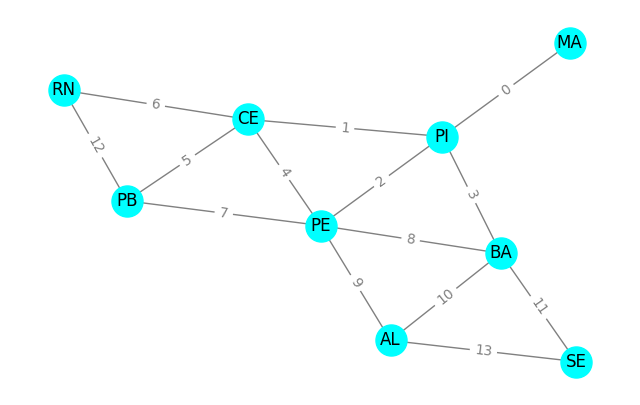

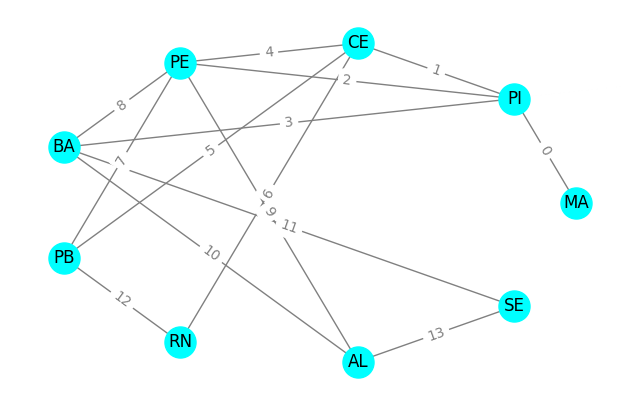

In [ ]:
#@title
#@markdown <a name="fig10">Figura 10</a>: Diferentes representações gráficas para o grafo $F$.
F = nx.Graph([('MA','PI'),('PI','CE'),('PI','PE'),('PI','BA'),('CE','PE'),
              ('CE','PB'),('CE','RN'),('PE','PB'),('RN','PB'),('PE','BA'),
              ('PE','AL'),('BA','AL'),('BA','SE',),('AL','SE')])
edge_labels = {k:l_edges.index(k) for l_edges in [list(F.edges)] for k in l_edges}
draw_graph(F,layoutid='kamada_kawai_layout', edge_labels=edge_labels)
draw_graph(F,layoutid='circular_layout', edge_labels=edge_labels)


Em aulas posteriores, estudaremos mais sobre como analisar e obter informações importantes em grafos e suas visualizações.

A seguir, apresentamos alguns conceitos básicos de grafos. Para exemplificar estes conceitos, utilizamos o grafo $G_1$ definido anteriormente ([Figura 9](#fig9)).
O conjunto de **vizinhos** de um vértice $v$  em um grafo $G$  é definido por $N_G(v)$. Em $G_1$, o conjunto de vizinhos de `d` é {`e`,`a`,`c`,`b`} e o conjunto de vizinhos de `a`  é  {`a`,`b`,`d`}.
Uma aresta com terminais:
* Idênticos é chamada de **loop**
* Distintos é chamada de **link**.

Em , `t` é um loop e `s` é um link.

Quando 2 ou mais links possuem o mesmo par de terminais estes são chamados de **arestas paralelas**. Um grafo com arestas paralelas é chamado de **multigrafo**. Alguns autores admitem que multigrafos podem conter loops. Outros denominam um grafo com loops de **pseudografo**. Pseudografos podem conter arestas paralelas. O grafo exemplo $G_1$  é um pseudografo e pode ser considerado um multigrafo por alguns autores.

Um grafo é **finito** se seus conjuntos de vértices e arestas são finitos.
O grafo sem vértices ($V(G) = \emptyset$) é chamado de **grafo nulo**. Um grafo é **vazio** quando possui vértices, mas não possui arestas ($E(G) = \emptyset$).

Qualquer grafo com apenas um vértice é chamado de **trivial**. Todos os outros grafos são grafos não-triviais.

Um grafo é **simples** se não possui loops ou arestas paralelas. Neste caso, a função de incidência pode ser ignorada porque podemos representar cada aresta por seus terminais, sem ambiguidade. Abaixo temos um exemplo de um grafo simples e sua definição formal, onde a função de incidência pode ser omitida.



# Exercícios Resolvidos



## 1
*Construa a lista completa de todos os grafos simples que tenham* {`a`,`b`,`c`} *por seu conjunto de vértices.*

<font color="red">Solução:</font>

Para todos os grafos $G_i$ que podem ser definidos, $V(G_i)$ = {`a`,`b`,`c`}. Assim, para cada grafo, vamos definir apenas o conjunto de arestas. Como os grafos são simples, não precisamos definir a função de incidência.
- $E(G_1)$ = {}
- $E(G_2)$ = {`ab`}
- $E(G_3)$ = {`ac`}
- $E(G_4)$ = {`bc`}
- $E(G_5)$ = {`ab`, `ac`}
- $E(G_1)$ = {`ab`, `bc`}
- $E(G_1)$ = {`ac`, `bc`}
- $E(G_1)$ = {`ab`, `ac`, `bc`}

## 2
*Sejam $p$ e $q$ dois números inteiros positivos. Podemos definir um grafo $L$ como*:

* $V(L)$ = $\{1,2,3,...,pq-2,pq-1,pq\}$
* $E(L)$ = $\{e \mid \psi_L(e) = \{i,j\} \wedge i < j$ $\wedge (j = i+q \vee (i \% q \neq 0 \wedge j = i+1$))\}.

*Apresente uma representação gráfica para $L$ considerando que $p = 3$ e $q = 4$.*

<font color="red">Solução:</font>

A representação de grafos pode ser construída de forma muito mais rápida e precisa através do uso de programação quando comparado ao desenho manual. Programação é um recurso muito importante no estudo e compreensão de Teoria dos Grafos. Abaixo, apresentamos uma visualização gráfica para o grafo $L$ onde utilizamos o pacote NetworkX o qual será introduzido em aulas posteriores. Note que, a partir do código, poderemos gerar o grafo correspondente para qualquer $p$ ou $q$. Basta selecionar os valores no form.

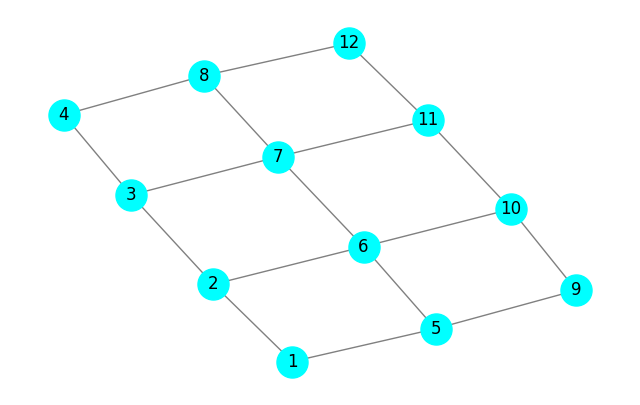

In [ ]:
#@title  { run: "auto" }
p = 3 #@param {type:"slider", min:1, max:5, step:1}
q = 4 #@param {type:"slider", min:1, max:4, step:1}
L = nx.Graph()
pq = p*q
L.add_nodes_from(list(range(1,pq+1)))
for i in range(1,pq+1): # i representa k
  for j in range(i+1,pq+1): # j representa k'
    if j == i+q or (i % q != 0 and j == i+1):
       L.add_edge(i,j)
draw_graph(L)

`Copyright @ 2023 Patrícia D. L. Machado`